# Matplotlib

Matplotlib je biblioteka za kreiranje vizualizacija u Python programskom jeziku

##### Kreiranje dijagrama

Matplotlib kreira grafike na figurama (```Figure```). Figura sadrži sve ostale objekte: region za crtanje podataka (```Axes```) sa 2 ili 3(za 3D) pojedinačne ose (```Axis```). Region ima i naslov i labelu za svaku osu.

Najlakši način za kreiranje figure sa osama je korišćenjem ```pyplot.subplots```. Onda możemo da koristimo ```Axes.plot``` da prikažemo podatke na osama.

*Note*: Koristićemo i NumPy, još jednu Python biblioteku, kao malu pomoć za kreiranje nizova i matrica i operacije nad njima.

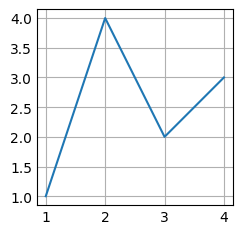

In [259]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # Kreiranje figure sa jednim regionom

ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Iscrtavanje podataka (odnosa x i y)

![primer](legend.png)

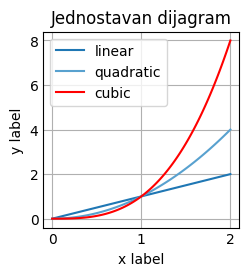

In [260]:
x = np.linspace(0, 2, 100)  # Podaci za primer. Jednako rasporedjeni brojevi u zadatom intervalu sa zadatim brojem generisanih semplova.

fig, ax = plt.subplots()

ax.plot(x, x, label='linear')  # Iscrtavanje podataka
ax.plot(x, x**2, label='quadratic')  # Još iscrtavanja podataka
ax.plot(x, x**3, label='cubic', color='red')  # ...i još

ax.set_xlabel('x label')  # Dodavanje x-labele
ax.set_ylabel('y label')  # Dodavanje y-labele
ax.set_title("Jednostavan dijagram")  # Dodavanje naslova
ax.legend()  # Dodavanje legende

plt.show()

## Bar chart

Jednostavan za jasan za razumevanje. Može se koristiti za prikazivanje vrednosti grupisanih po kategoriji.

Primer: Broj studenata po državi.

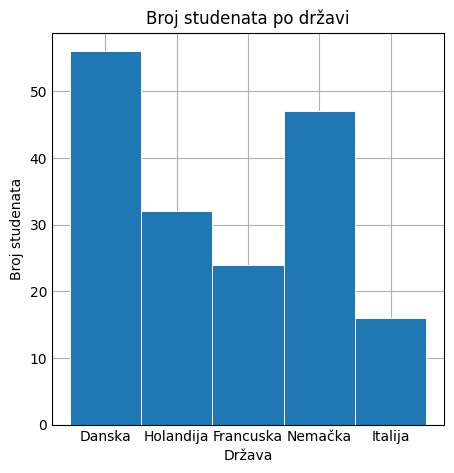

In [261]:
# napravi podatke:
x = ['Danska', 'Holandija', 'Francuska', 'Nemačka', 'Italija']
y = [56, 32, 24, 47, 16]

# iscrtaj:
fig, ax = plt.subplots(figsize=(4,4))

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set_xlabel("Država")
ax.set_ylabel("Broj studenata")
ax.set_title("Broj studenata po državi")

plt.show()

### Scatter chart

Za prikazivanje korelacije veličina može se koristiti scatterplot. Vrednost jedne promenljive se  prikaže na X osi, vrednost druge na Y osi, a svaka tačka je često individualna pojava iz podataka - osoba, sesija, primerak...

Primer: Krvni pritisak pacijenta u odnosu na starost

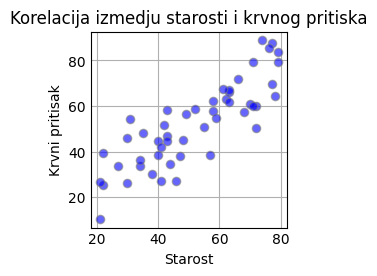

In [268]:
# napravi (dobre) nasumične podatke:
np.random.seed(42)
num_points = 50
age = np.random.randint(20, 80, num_points)
blood_pressure = age + np.random.normal(0, 10, num_points)

# iscrtaj:
fig, ax = plt.subplots()

ax.scatter(age, blood_pressure, alpha=0.6, c='blue', edgecolors='gray')

plt.xlabel('Starost')
plt.ylabel('Krvni pritisak')
plt.title('Korelacija izmedju starosti i krvnog pritiska')

plt.show()

Ako treba uneti i treću promenljivu, može se promeniti veličina svake tačke tako da predstavlja vrednost treće promenljive. Onda dobijamo - bubble chart.

Primer: Krvni pritisak pacijenta u odnosu na starost, težina kao veličinom bubble-a

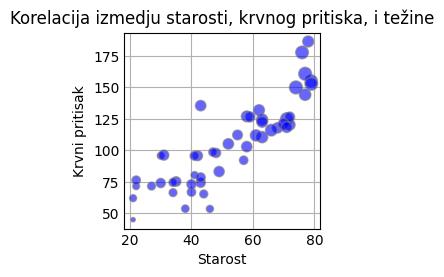

In [263]:
# napravi (dobre) nasumične podatke:
np.random.seed(42)
num_points = 50
age = np.random.randint(20, 80, num_points)
weight = age + np.random.normal(0, 10, num_points)
blood_pressure = age + weight + np.random.normal(0, 15, num_points)

# iscrtaj:
fig, ax = plt.subplots()

ax.scatter(age, blood_pressure, s=weight, alpha=0.6, c='blue', edgecolors='gray')

plt.xlabel('Starost')
plt.ylabel('Krvni pritisak')
plt.title('Korelacija izmedju starosti, krvnog pritiska, i težine')

plt.show()

## Line chart

Koristi se za prikazivanje promene odredjene mere kroz vreme, naročito kada X osa ima dosta vrednosti.
Na taj način se može videti da li postoji trend rasta, koja je maksimalna vrednost u poslednjih nedelju dana i slično.
Primer: Profit po danu, nedelji, mesecu

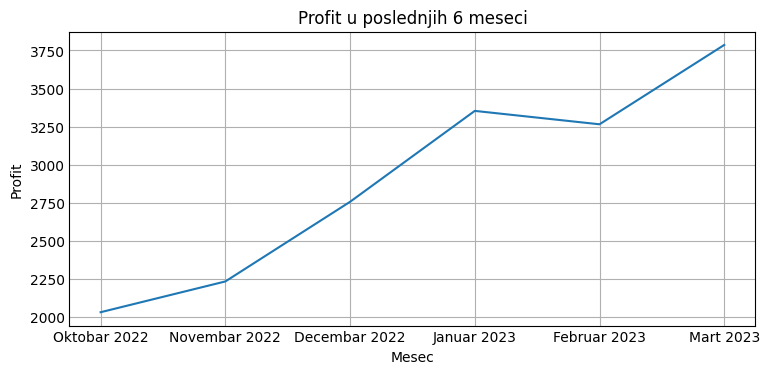

In [264]:
# napravi podatke:
x = ['Oktobar 2022', 'Novembar 2022', 'Decembar 2022', 'Januar 2023', 'Februar 2023', 'Mart 2023']
y = [2031, 2233, 2756, 3353, 3265, 3786]

# iscrtaj:
fig, ax = plt.subplots(figsize=(7,3))

ax.plot(x, y)

ax.set_xlabel("Mesec")
ax.set_ylabel("Profit")
ax.set_title("Profit u poslednjih 6 meseci")

plt.show()

## Stack chart (Area chart)

Korisni su za praćenje proporcija dve metrike kroz vreme
Primer: Broj prodatih proizvoda po kategoriji

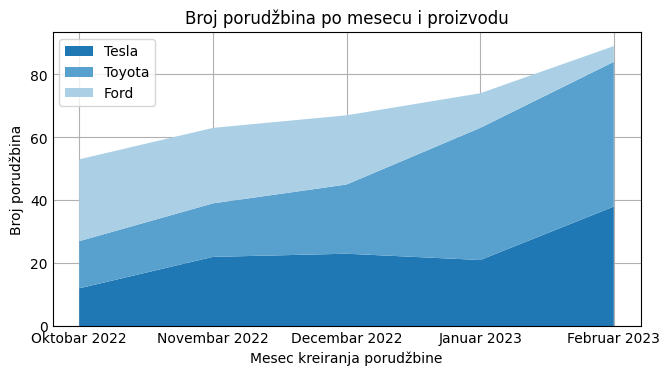

In [265]:
# napravi podatke:
x = ['Oktobar 2022', 'Novembar 2022', 'Decembar 2022', 'Januar 2023', 'Februar 2023']
ay = [12, 22, 23, 21, 38]
by = [15, 17, 22, 42, 46]
cy = [26, 24, 22, 11, 5]
y = np.vstack([ay, by, cy])

# iscrtaj:
fig, ax = plt.subplots(figsize=(6,3))

ax.stackplot(x, y, labels=["Tesla", "Toyota", "Ford"])

ax.legend(loc='upper left')
ax.set_xlabel("Mesec kreiranja porudžbine")
ax.set_ylabel("Broj porudžbina")
ax.set_title("Broj porudžbina po mesecu i proizvodu")

plt.show()

### Pie ili donut chart

Koristi se za razdvajanje metrike po jednoj dimenziji, naročito kada je broj razdvajanja mali.
Primer: broj korisnika po polu.

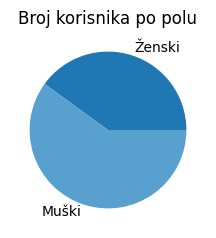

In [266]:
labels = 'Ženski', 'Muški'
sizes = [40, 60]

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels)

ax.set_title("Broj korisnika po polu")

plt.show()

### Histogram chart

Koristi se za prikazivanje broja pojava unutar svakog intervala vrednosti
Primer: visina ljudi u opsezima

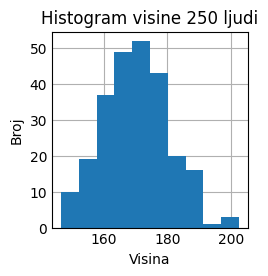

In [267]:
# napravi podatke:

x = np.random.normal(170, 10, 250)

# iscrtaj:
fig, ax = plt.subplots()

ax.hist(x)

ax.set_ylabel("Broj")
ax.set_xlabel("Visina")
ax.set_title("Histogram visine 250 ljudi")

plt.show()